In [1]:
import sklearn

In [9]:
import os
import requests
import tarfile

home = os.path.expanduser("~")

IMG_WIDTH = 32
IMG_HEIGHT = 32
NUM_CHANNELS = 3
DATA_URL = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
LOCAL_DIR = os.path.join(home, 'PhD', 'tooploox')
LOCAL_ZIPPED = 'cifar_dataset.tar.gz'
DATA_DIRNAME = 'cifar_data'


def download_file(url, download_dir, local_filename):
    local_filepath = os.path.join(download_dir, local_filename)
    if not os.path.exists(download_dir):
        os.makedir(download_dir)
    response = requests.get(DATA_URL, stream=True)
    with open(local_filepath, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024): 
            if chunk:
                f.write(chunk)
    LOCAL_FILENAME = 'cifar_dataset.tar.gz'
    tfile = tarfile.open(name=os.path.join(LOCAL_DIR,LOCAL_FILENAME),  mode="r:gz")
    out_dir = os.path.join(LOCAL_DIR, DATA_DIRNAME)
    os.mkdir(out_dir)
    tfile.extractall(out_dir)
    os.remove(local_filepath)
    

    
    
download_file(DATA_URL, LOCAL_DIR, LOCAL_ZIPPED)

        

NameError: name 'ZipFile' is not defined

In [68]:
import os
from os.path import expanduser
home = expanduser("~")
LOCAL_DIR = os.path.join(home, 'PhD', 'tooploox')
LOCAL_ZIPPED = 'cifar_dataset.tar.gz'
DATA_DIRNAME = 'cifar_data'

import pickle
def read(file):
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')
train_data = read(os.path.join(LOCAL_DIR, DATA_DIRNAME, 'cifar-10-batches-py', 'data_batch_1'))
test_data = read(os.path.join(LOCAL_DIR, DATA_DIRNAME, 'cifar-10-batches-py', 'test_batch'))

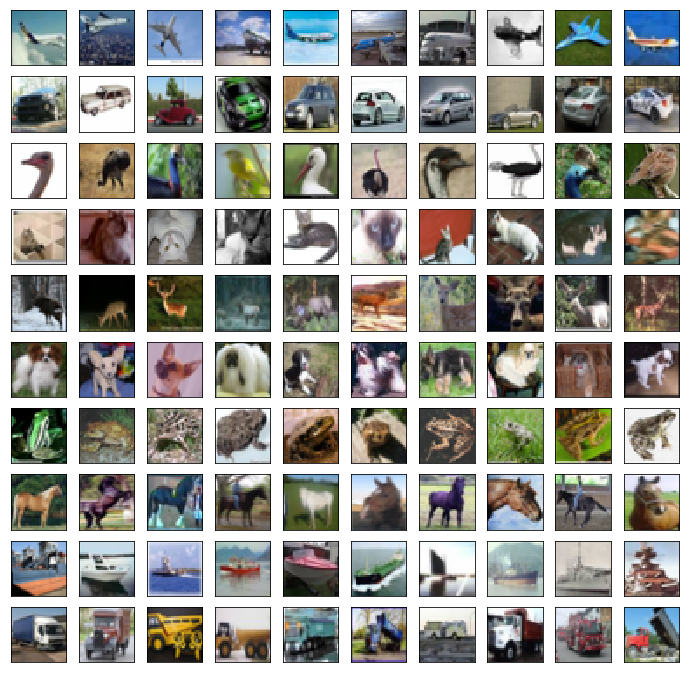

In [75]:
import numpy as np
from numpy.random import choice
from copy import deepcopy
from matplotlib import pyplot as plt

N_IMAGES_TO_SHOW = 10
IMAGE_CLASSES = 10
IMAGE_W = 32
IMAGE_H = 32
CHANNELS = 3
N_IMAGES_PER_CLASS = 500


def get_labels(data):
    labels = data[ b'labels']
    return np.array(labels)

def get_images_and_labels(data, shuffle=True):
    labels = get_labels(data)
    images = np.concatenate([get_random_n_images(data[b'data'], labels, c, N_IMAGES_PER_CLASS) 
              for c in range(10)])
    labels = np.concatenate([[c]*N_IMAGES_PER_CLASS for c in range(10)])
    images = np.array([process_image(i) for i in images])
    if shuffle:  
        permutation = np.random.shuffle(list(range(len(images))))
        images = images[permutation]
        labels = labels[permutation]
    return images, labels

def process_image(i):
    i = i.reshape(CHANNELS, IMAGE_W, IMAGE_H)
    return np.transpose(i, [1,2,0])
    
def get_random_n_images(images, labels, cls, no_images):
    class_images = images[labels==cls]
    chosen_indices = choice(range(N_IMAGES_PER_CLASS), no_images, replace=False)
    return class_images[chosen_indices]

def get_images_to_show(images, labels):
    return np.concatenate([get_random_n_images(images, labels, x, N_IMAGES_TO_SHOW) 
                           for x in range(IMAGE_CLASSES)])
 
def remove_axes(fig):
    for ax in fig.axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
def plot_images(images):
    fig=plt.figure(figsize=(12, 12))
    columns = N_IMAGES_TO_SHOW
    rows = IMAGE_CLASSES
    for x, i in zip(range(1, columns*rows +1), images):
        fig.add_subplot(rows, columns, x)
        plt.imshow(i)
    remove_axes(fig)
    plt.show()
    
train_images, train_labels = get_images_and_labels(train_data)
test_images, test_labels = get_images_and_labels(test_data)
images_to_show = get_images_to_show(train_images, train_labels)
plot_images(images_to_show)

In [51]:
from skimage.feature import hog

def get_features(image):
    return hog(image, orientations=8, pixels_per_cell=(4, 4),
               cells_per_block=(1, 1), visualize=True, multichannel=True, 
               block_norm='L2')[0]

#TODO - make it np apply
train_data = np.stack([get_features(i) for i in train_images])
test_data = np.stack([get_features(i) for i in test_images])

In [55]:
from sklearn.svm import SVC
d = np.stack(dataset)
svm_classifier = SVC()
svm_classifier = svm_classifier.fit(d, labels)

In [64]:
predicted_labels = svm_classifier.predict(test_data)
sum(predicted_labels == test_labels)/len(test_labels)

0.4642